In [4]:
from Segmentation import k_means
from Morphology import morph
from Color import space_color
import matplotlib.pyplot as plt
import cv2 as cv

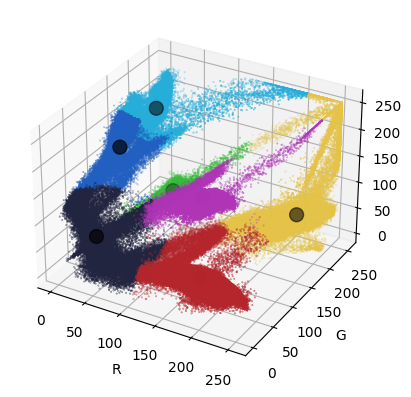

In [5]:
img = cv.imread("balls.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixels = k_means.PixelList(img)

data = pixels.get_data()
kmeans = k_means.Kmeans_classifier(data,7)
#Se crea el objeto de clasificador k-means
kmeans.fit(max_iterations=1000)
#Se muestra el resultado de la clasificación
kmeans.visualize_clusters()
# wcss_values = k_means.Kmeans_classifier.calculate_wcss(data, 10)  
# #^ Se muestra la gráfica del método del codo ^#
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(wcss_values) + 1), wcss_values, marker='o', color='purple')
# plt.title('Método del Codo')
# plt.xlabel('Número de Clústeres (k)')
# plt.ylabel('WCSS')
# plt.grid()
# plt.show()





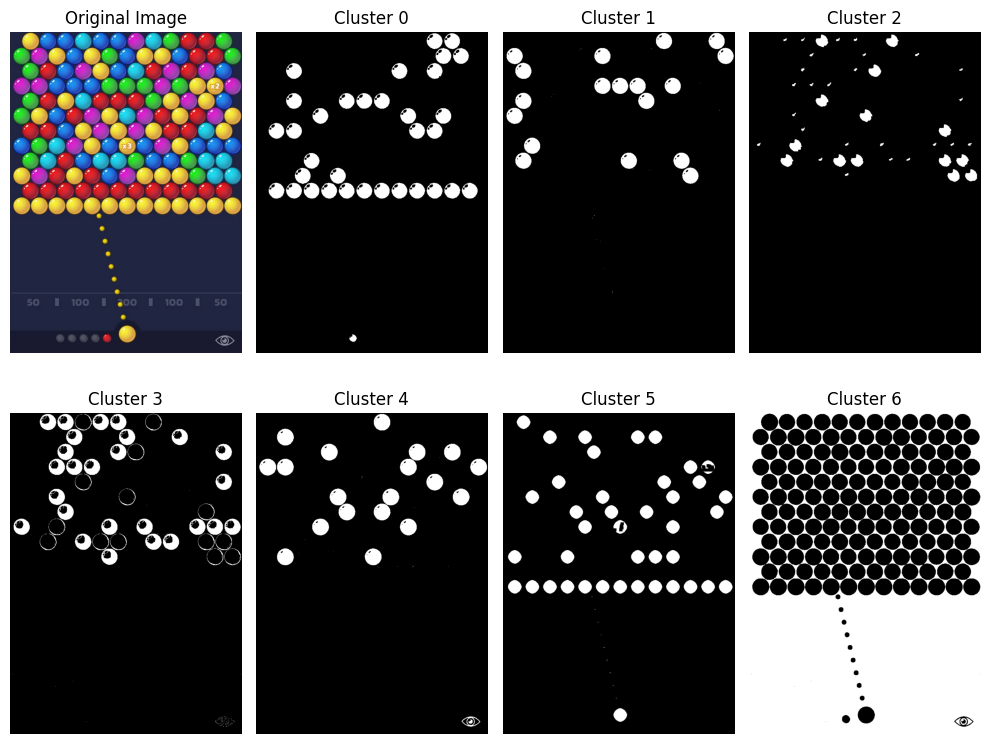

In [30]:
#Se muestran las imágenes segmentadas
cluster_images = kmeans.generate_cluster_images(img)
#Operaciones morfológicas a cada imagen
#conversion a blanco y negro
for i in range(7):
    cluster_images[i] = cv.cvtColor(cluster_images[i], cv.COLOR_RGB2GRAY)
cluster_images[0] = morph.erosion(cluster_images[0],3,1)
cluster_images[2] = morph.erosion(cluster_images[2],3,4)
cluster_images[5] = morph.erosion(cluster_images[5],3,4)
#Se muestran las imágenes segmentadas
plt.figure(figsize=(10, 8))
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i in range(7):
    plt.subplot(2, 4, i + 2)
    plt.imshow(cluster_images[i],cmap="gray")
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
